### Assignment 9
For this assignment , we will use the college scorecard dataset.

# 1. Prep the Environement/Data

In [ ]:
# 1 - Import necessary libraries
import os, random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 2 - Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22 files
Files= os.listdir('CollegeScorecard_Raw_Data')
Files

['MERGED2004_05_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2005_06_PP.csv']

In [ ]:
# 3 - Write code to randomly select one file name out of the 22 files names. 
# Hint: generate a random integer between 0 and 21 first
# Display the file name
random_file=random.choice(os.listdir("CollegeScorecard_Raw_Data"))
print ("File Name:",random_file)

File Name: MERGED2011_12_PP.csv


# 2. Data Cleaning

In [ ]:
# 4 - Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")
# from this file into a data frame aand display use info() function to display a summary information

df = pd.read_csv(random_file,index_col=None, header=0, usecols=["INSTNM","TUITIONFEE_IN"])
df

,INSTNM,TUITIONFEE_IN
0,Alabama A & M University,6828.0
1,University of Alabama at Birmingham,6264.0
2,Amridge University,8720.0
3,University of Alabama in Huntsville,8094.0
4,Alabama State University,8082.0
...,...,...
7741,Unitek College,17192.0
7742,Twin Rivers Adult School - Grand Avenue Center,NaN
7743,Twin Rivers Adult School - Arnold Avenue Center,NaN
7744,Greater Sacramento Urban League,NaN


In [ ]:
# 5 - Find out how many observations have missing value.
print(" \nCount total NaN at each column in a DataFrame : \n\n", df.isnull().sum()) 

 
Count total NaN at each column in a DataFrame : 

 INSTNM              0
TUITIONFEE_IN    3302
dtype: int64


In [ ]:
# 6 - Drop those observations with missing value
# Disaply the number of observations afterward
df["TUITIONFEE_IN"] = df["TUITIONFEE_IN"].fillna(0)
print(" \nCount total NaN at each column in a DataFrame : \n\n", df.isnull().sum()) 

 
Count total NaN at each column in a DataFrame : 

 INSTNM           0
TUITIONFEE_IN    0
dtype: int64


In [ ]:
# 7 - Find out how many observations have 0 tution. 
df[df["TUITIONFEE_IN"]== 0]

,INSTNM,TUITIONFEE_IN
7,Athens State University,0.0
18,New Beginning College of Cosmetology,0.0
59,United States Sports Academy,0.0
66,Alaska Vocational Technical Center,0.0
69,Alaska Career College,0.0
...,...,...
7726,Chamberlain College of Nursing-Miramar Campus,0.0
7742,Twin Rivers Adult School - Grand Avenue Center,0.0
7743,Twin Rivers Adult School - Arnold Avenue Center,0.0
7744,Greater Sacramento Urban League,0.0


In [ ]:
# 8 - Drop those observations with 0 tuition
# Disaply the number of observations afterward
df= df[df['TUITIONFEE_IN'] != 0]
df

,INSTNM,TUITIONFEE_IN
0,Alabama A & M University,6828.0
1,University of Alabama at Birmingham,6264.0
2,Amridge University,8720.0
3,University of Alabama in Huntsville,8094.0
4,Alabama State University,8082.0
...,...,...
7737,Strayer University-Irving,14805.0
7738,Strayer University-Katy,14805.0
7739,Strayer University-Northwest Houston,14805.0
7740,Strayer University-Plano,14805.0


# 3. Analyze data stats: 

In [ ]:
# 9 - Calculate and display the mean (average) of the tuitions of all the remaining observations 
df.describe()

,TUITIONFEE_IN
count,4439.000000
mean,13076.547421
std,9927.895300
min,182.000000
25%,4832.000000
50%,11525.000000
75%,18022.500000
max,70024.000000


In [ ]:
# 10 - Randomly select just 1 observation from the data frame.
# Display the tuition of that observation. 
dfr= df.sample() 
dfr

,INSTNM,TUITIONFEE_IN
1352,Dordt University,24300.0


In [ ]:
# 11 - Calculate the different between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
# Display the difference
TF1= dfr["TUITIONFEE_IN"]
Diff= TF1-(df["TUITIONFEE_IN"].mean())
Diff

1352    11223.452579
Name: TUITIONFEE_IN, dtype: float64

In [ ]:
# 12 - Repeat 10 to 11 several times get the feel of the size of the difference in means
dfr1= df.sample()
TF2= dfr1["TUITIONFEE_IN"]
Diff= TF2-(df["TUITIONFEE_IN"].mean())
Diff

5037   -10436.547421
Name: TUITIONFEE_IN, dtype: float64

In [ ]:
dfr2= df.sample()
TF3= dfr2["TUITIONFEE_IN"]
Diff= TF3-(df["TUITIONFEE_IN"].mean())
Diff

3741   -9712.547421
Name: TUITIONFEE_IN, dtype: float64

In [ ]:
dfr3= df.sample()
TF4= dfr3["TUITIONFEE_IN"]
Diff= TF4-(df["TUITIONFEE_IN"].mean())
Diff

5504    7193.452579
Name: TUITIONFEE_IN, dtype: float64

In [ ]:
dfr4= df.sample()
TF5= dfr4["TUITIONFEE_IN"]
Diff= TF5-(df["TUITIONFEE_IN"].mean())
Diff

2670   -8341.547421
Name: TUITIONFEE_IN, dtype: float64

In [ ]:
# 13 - Randomly select 20 observations, display the tuition of these observation.
dfr20= df.sample(20)
dfr20

,INSTNM,TUITIONFEE_IN
1621,Southern University at New Orleans,3906.0
3068,James A Rhodes State College,4441.0
4482,Vatterott College-Berkeley,11834.0
2349,Granite State College,6810.0
19,George C Wallace Community College-Dothan,3330.0
1184,Parkland College,3210.0
4371,Casper College,2136.0
5126,Lincoln College of New England-Suffield,19980.0
5248,Veeb Nassau County School of Practical Nursing,13500.0
3974,Southwestern Christian College,6910.0


In [ ]:
# 14 - Calculate and displat the mean tuition of these 20 observations
df_mean20= dfr20["TUITIONFEE_IN"].mean()
df_mean20

12803.7

In [ ]:
# 15 - Calculate  the different between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference
Diff2= df_mean20 -(df["TUITIONFEE_IN"].mean())
Diff2

-272.8474205902221

In [ ]:
# 16 - Repeat 13 to 15 several times and get the feel of the size of the difference in means 
# Compare these differences with the differences calculated earlier with just 1 observation
# Describe your hunch/conclusion

In [ ]:
dfr20= df.sample(20)
df_mean20= dfr20["TUITIONFEE_IN"].mean()
Diff3= df_mean20 -(df["TUITIONFEE_IN"].mean())
Diff3

98.85257940977681

In [ ]:
dfr20= df.sample(20)
df_mean20= dfr20["TUITIONFEE_IN"].mean()
Diff4= df_mean20 -(df["TUITIONFEE_IN"].mean())
Diff4

3282.152579409778

In [ ]:
dfr20= df.sample(20)
df_mean20= dfr20["TUITIONFEE_IN"].mean()
Diff5= df_mean20 -(df["TUITIONFEE_IN"].mean())
Diff5

-474.6474205902232

The diffence in means varries depndent which random sampling of schools is chosen 

# 4. Visualization

Write a function that take two input parameters:
- x (number of observations) 
- y (the name of the dataframe). 

The function will perform the following: 
- Randomly select x observations from y
- Calculate the mean of these x observations 
- Calculate the mean of all observations
- Calculate the difference between the two means 
- Return the difference

In [ ]:
# 17 - write function Code here DIFFM is the mean difference using two variables X and Y 
def DiffM (x,y):
    df_x=y.sample(x)
    mean_x=df_x["TUITIONFEE_IN"].mean()
    df_mean=df["TUITIONFEE_IN"].mean()
    return mean_x-df_mean

In [ ]:
# 18 - test the function by passing a sample size and the name of the dataframe
# Dsplay the return of the function Use sample size 10 and the orgiginal data frame to find the differnce in means
DiffM(10,df)

4148.052579409776

In [ ]:
# 19 - Create a list of sequence numbers from 1 to 50, name it "sample_sizes";
# display it to make sure its members are from 1 to 50
sample_sizes= list(range(1, 51))
print(sample_sizes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [ ]:
# 20 - Create an empty list and name it "means_diff" for differences of population mean and sample means;
# Loop through the list sample_sizes:
# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed

means_diff=[]
for num in sample_sizes: 
    df_num= df.sample(num)
    mean_num=df_num['TUITIONFEE_IN'].mean()
    difference=mean_num-(df["TUITIONFEE_IN"].mean())
    means_diff.append(difference)
print(means_diff)

[-11156.547420590223, 531.4525794097772, -8520.214087256889, 212.95257940977717, -9308.147420590223, 4912.952579409777, -7840.118849161651, 4575.952579409777, 2733.452579409777, -1125.0474205902228, -3429.8201478629508, -755.7140872568889, -1590.8551128979143, -124.47599201879348, -2183.2807539235564, -3075.422420590223, 565.6290499980132, 3459.3414682986677, -1627.1263679586446, -188.0974205902221, -200.11884916165218, -2832.183784226587, -269.8952466771789, 1569.7025794097772, -215.42742059022203, 1860.7218101790077, -999.4363094791115, -1782.0831348759366, -2229.7543171419475, -336.9807539235553, 2733.065482635584, -149.07867059022283, 3138.664700621899, -479.19447941375256, -745.2617063045091, -1269.8529761457776, 1353.3714983286955, 23.42626362030387, -778.5217795645822, 3162.577579409777, -156.18156693168567, 1335.8573413145386, -663.2450950088278, 1896.6798521370492, 605.98591274311, 825.7134489749951, -2150.015505696605, -51.94325392355677, 1178.2893141036548, -1050.52742059022

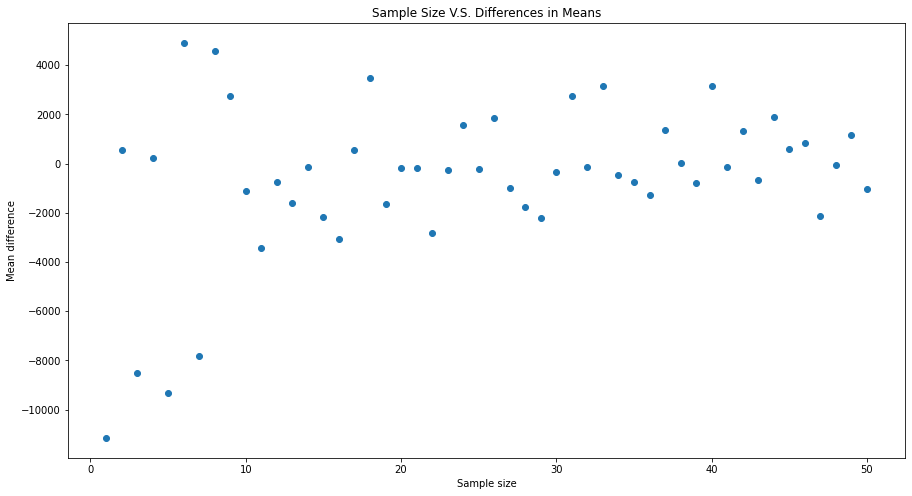

In [ ]:
# 21 - Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough
plt.scatter(sample_sizes,means_diff,plt.gcf().set_size_inches(15, 8))
plt.xlabel('Sample size')
plt.ylabel('Mean difference')
plt.title('Sample Size V.S. Differences in Means')
plt.show()

In [ ]:
# 22 - repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000.
# and see how the plot looks.
sample_sizes2= list(range(1, 301))
print(sample_sizes2)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [ ]:
means_diff=[]
for num in sample_sizes2: 
    df_num= df.sample(num)
    mean_num=df_num['TUITIONFEE_IN'].mean()
    difference=mean_num-(df["TUITIONFEE_IN"].mean())
    means_diff.append(difference)
print(means_diff)

[513.4525794097772, 3293.452579409777, -400.2140872568889, 3266.702579409777, -1770.5474205902228, 5766.785912743109, -1922.8331348759366, 41.32757940977717, 4526.897023854222, -1835.0474205902228, -2862.365602408405, 6511.035912743109, 9411.760271717469, -3238.904563447366, 2956.852579409777, 1327.1400794097772, -1753.0180088255165, -2210.991865034668, -1679.2316311165378, 914.1525794097779, -2035.7855158283182, -2085.183784226587, -2121.2430727641367, 2702.160912743111, -523.1874205902222, -1150.8551128979143, -3232.8807539235568, -2943.6902777330797, -3517.5129378316014, 1901.7192460764436, 638.2912890871958, 366.7025794097772, -2013.7595418023448, -1194.1944794137526, -2991.318849161651, 444.8970238542224, 249.56068751788553, -2000.7579469060129, 2008.4525794097772, 3153.7525794097764, 527.6720916048998, -610.7617063045091, 1406.1502538283821, -287.4337842265868, -1691.0585317013338, 686.3656228880373, 490.28236664381984, 740.9734127431111, -1261.9555838555298, -1692.5674205902233,

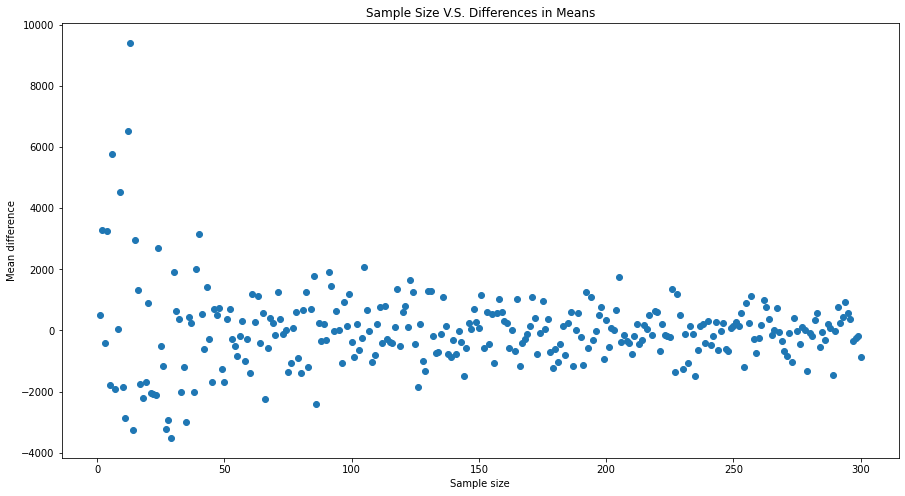

In [ ]:
plt.scatter(sample_sizes2,means_diff,plt.gcf().set_size_inches(15, 8))
plt.xlabel('Sample size')
plt.ylabel('Mean difference')
plt.title('Sample Size V.S. Differences in Means')
plt.show()